In [6]:
import csv
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

from tqdm.auto import tqdm
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 1 # So we get image one by one
IMAGE_SHAPE = (128, 128)
PROCESSED_DATASET_PATH_MNETV2_TEST = Path("../animal-10-Sample/")


PRETRAINED_MODEL = "./resnet_a10.pth"

print(device)

cuda:0


In [7]:
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SHAPE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

test_set = datasets.ImageFolder(PROCESSED_DATASET_PATH_MNETV2_TEST, transform=test_transform)
test_loader = DataLoader(test_set, shuffle=True)

In [8]:
model = torchvision.models.resnet18(num_classes=len(test_set.classes), pretrained=False)
model = model.to(device)
model.load_state_dict(torch.load(PRETRAINED_MODEL))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


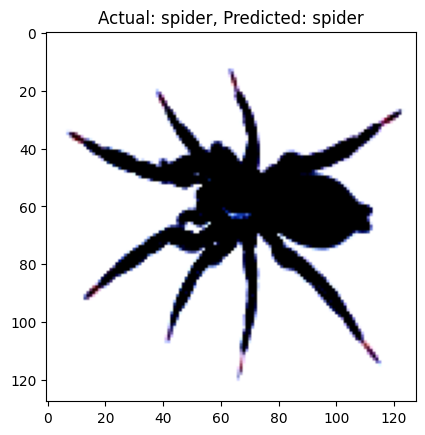

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


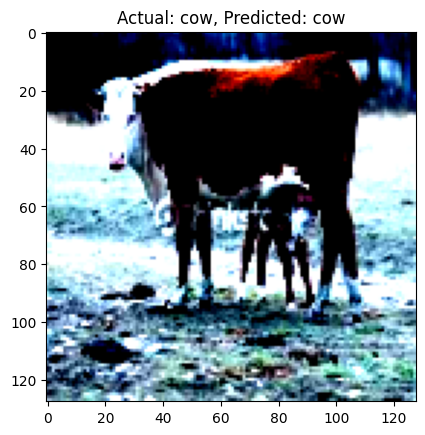

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


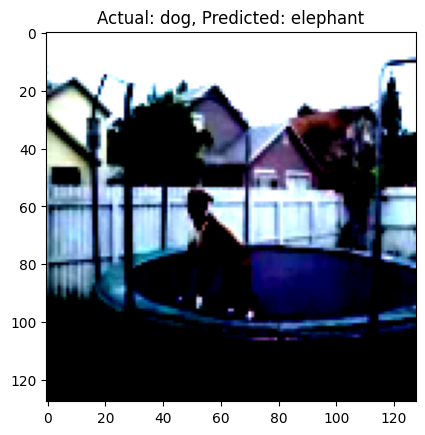

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


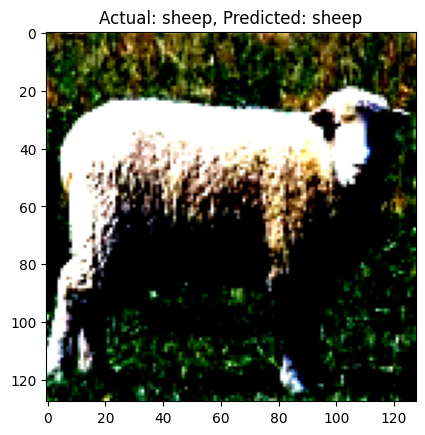

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


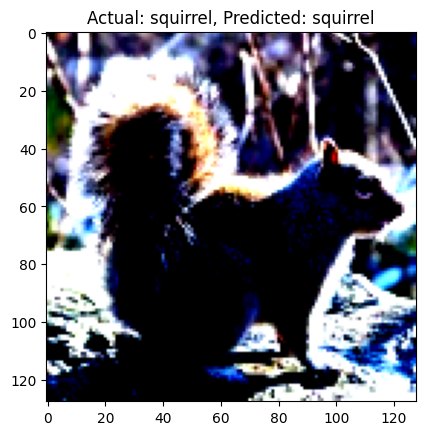

In [9]:
for i in range(5):
    images, labels = next(iter(test_loader))
    pred = np.squeeze(model(images.cuda()).data.max(1, keepdim=True)[1].cpu().numpy()) 
    plt.imshow(np.transpose(images[0] , (1,2,0)))
    plt.title(f"Actual: {test_set.classes[labels[0]]}, Predicted: {test_set.classes[pred]}")
    plt.show()

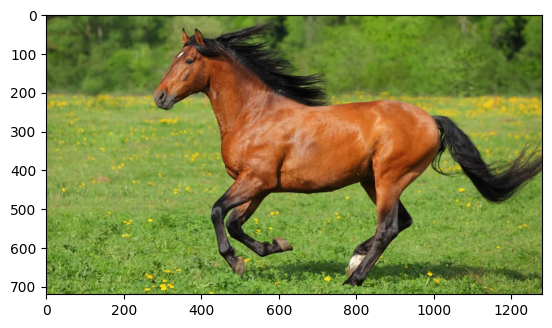

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> torch.Size([3, 128, 128])


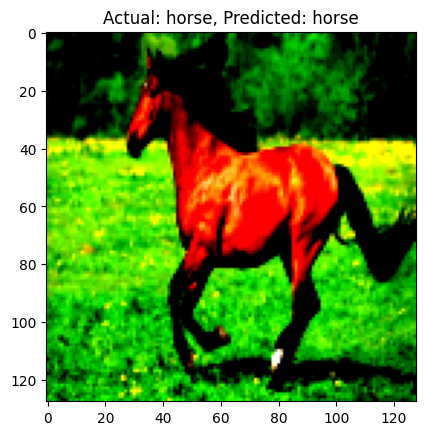

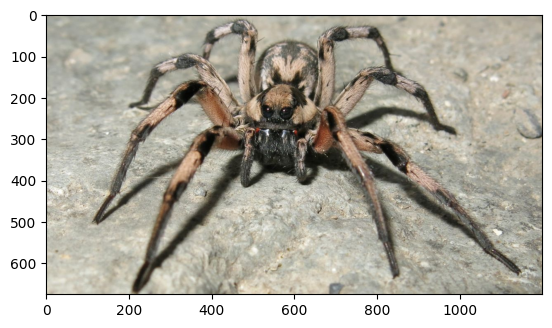

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> torch.Size([3, 128, 128])


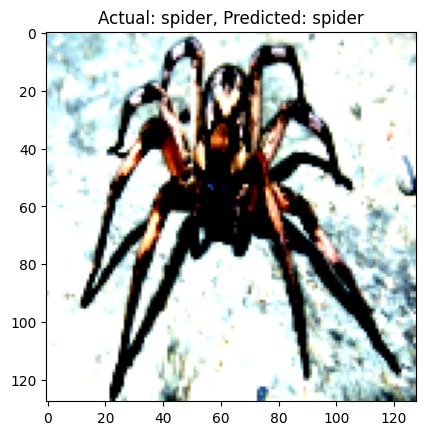

In [12]:
# Solve for a random animal image
from PIL import Image
import requests
import numpy

from io import BytesIO


def predict_from_internet(url, label):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.show()
    img = test_transform(img)
    print(type(img), img.shape)
    pred = int(np.squeeze(model(img.unsqueeze(0).cuda()).data.max(1, keepdim=True)[1].cpu().numpy()))
    plt.imshow(np.transpose(img , (1,2,0)))
    plt.title(f"Actual: {label}, Predicted: {test_set.classes[pred]}")
    plt.show()



predict_from_internet("https://horseyhooves.com/wp-content/uploads/2022/08/Beautiful-horse-running-in-a-grassy-field.jpg.webp", "horse")
predict_from_internet("https://dynaimage.cdn.cnn.com/cnn/c_fill,g_auto,w_1200,h_675,ar_16:9/https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F170715120542-lycosa-aragogi.jpg","spider")